In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.metrics import r2_score 


print(tf.__version__)

2.11.0


In [2]:
df = pd.read_csv(r"./HousingData.csv")


In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [4]:
df.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [5]:
df = df.dropna()

In [6]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [7]:
unwanted_columns = ['B' , 'CHAS' , 'ZN']
for col in unwanted_columns :
    df.pop(col)

In [8]:
df.head()

,CRIM,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
5,0.02985,2.18,0.458,6.430,58.7,6.0622,3,222,18.7,5.21,28.7


In [9]:
TRAIN_DATA_RATIO = 0.8
RANDOM_STATE = 21

train_dataset = df.sample(frac= TRAIN_DATA_RATIO , random_state= RANDOM_STATE )


In [10]:
test_dataset = df.drop(train_dataset.index)

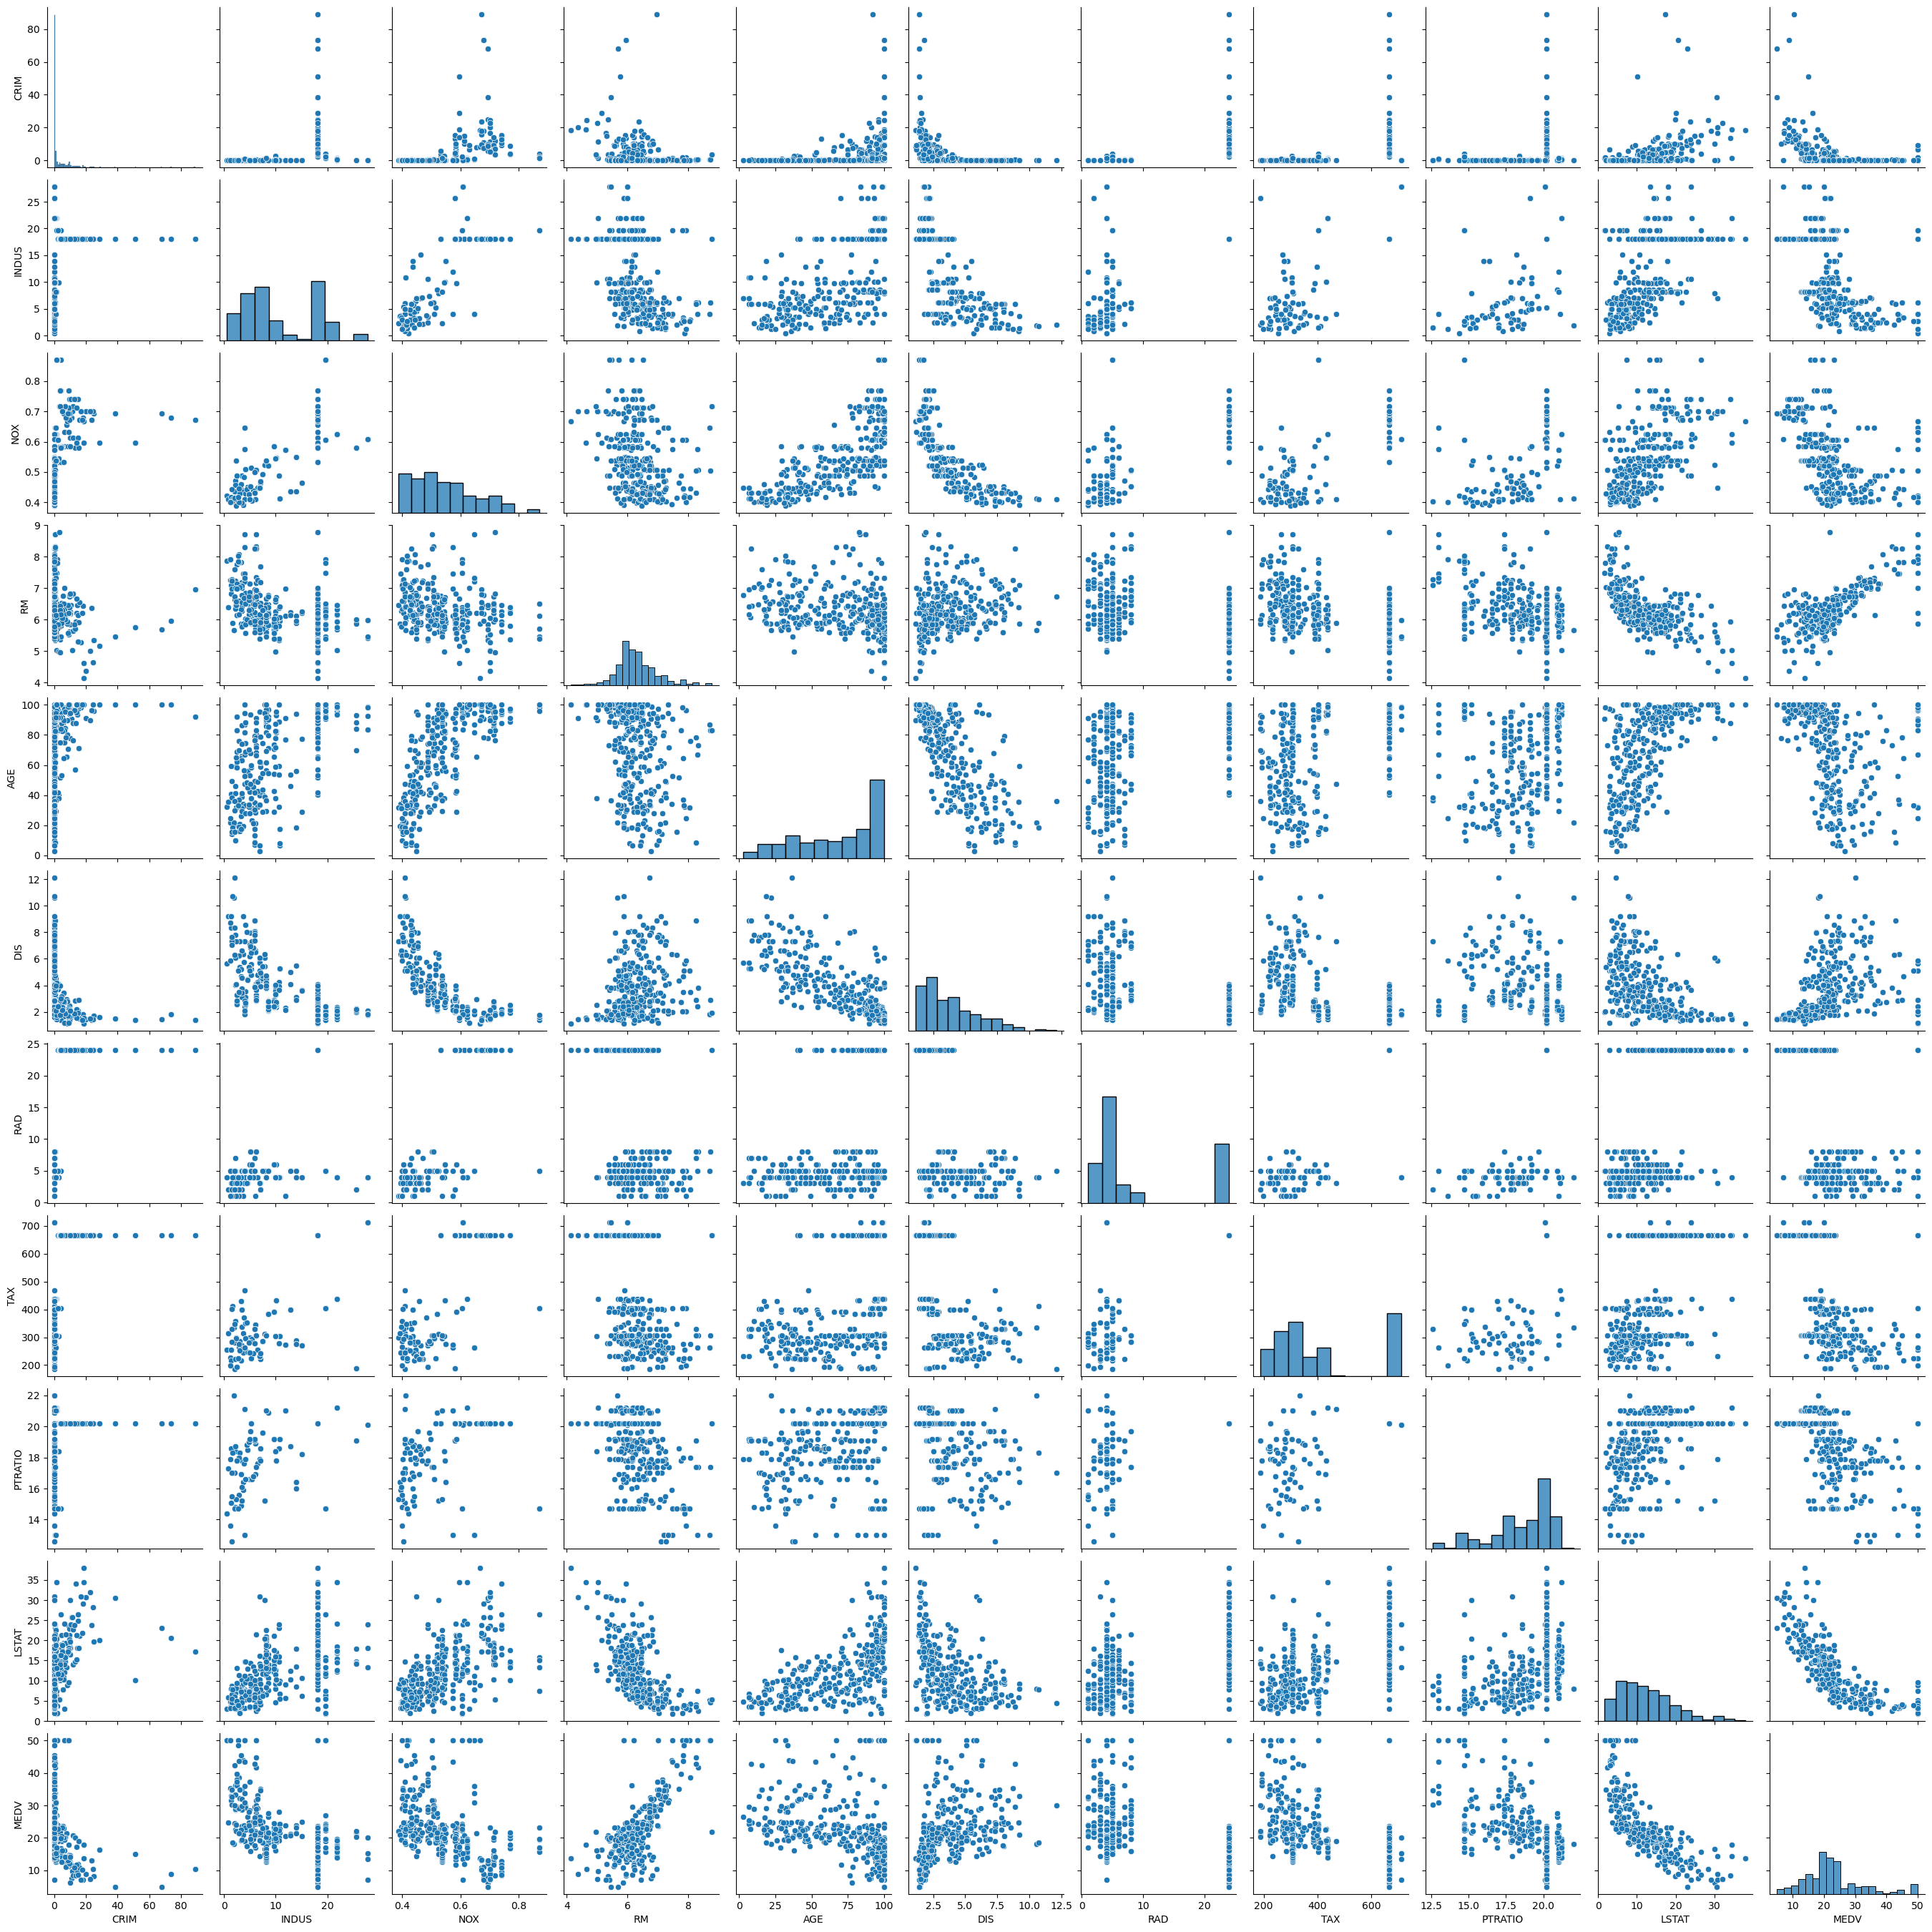

In [11]:
sns.pairplot(train_dataset)


In [12]:
train_dataset.to_csv(r"./trainData.csv")


In [13]:
train_data_stats = train_dataset.describe()
train_data_stats

,CRIM,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,315.000000,315.000000,315.000000,315.000000,315.000000,315.00000,315.000000,315.000000,315.000000,315.000000,315.000000
mean,3.659839,10.795524,0.546165,6.314651,67.813968,3.87173,9.314286,404.279365,18.637143,12.474603,22.688254
std,9.453458,6.855349,0.108224,0.699248,28.177401,2.10891,8.622273,168.257702,2.102452,7.051370,9.384916
min,0.006320,0.460000,0.389000,4.138000,2.900000,1.12960,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.075595,5.160000,0.448500,5.886500,42.400000,2.16765,4.000000,279.500000,17.500000,6.925000,17.300000
50%,0.253870,8.140000,0.532000,6.209000,76.000000,3.31750,5.000000,330.000000,19.100000,11.280000,21.200000
75%,2.726930,18.100000,0.609000,6.632500,93.700000,5.11735,16.000000,666.000000,20.200000,16.490000,25.000000
max,88.976200,27.740000,0.871000,8.780000,100.000000,12.12650,24.000000,711.000000,22.000000,37.970000,50.000000


In [14]:
train_labels = train_dataset.pop("MEDV")
test_labels = test_dataset.pop("MEDV")


In [15]:
test_dataset

,CRIM,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
7,0.14455,7.87,0.524,6.172,96.1,5.9505,5,311,15.2,19.15
11,0.11747,7.87,0.524,6.009,82.9,6.2267,5,311,15.2,13.27
32,1.38799,8.14,0.538,5.950,82.0,3.9900,4,307,21.0,27.71
39,0.02763,2.95,0.428,6.595,21.8,5.4011,3,252,18.3,4.32
58,0.15445,5.13,0.453,6.145,29.2,7.8148,8,284,19.7,6.86
...,...,...,...,...,...,...,...,...,...,...
476,4.87141,18.10,0.614,6.484,93.6,2.3053,24,666,20.2,18.68
486,5.69175,18.10,0.583,6.114,79.8,3.5459,24,666,20.2,14.98
490,0.20746,27.74,0.609,5.093,98.0,1.8226,4,711,20.1,29.68
500,0.22438,9.69,0.585,6.027,79.7,2.4982,6,391,19.2,14.33


In [16]:
train_labels

274    32.4
65     23.5
416     7.5
361    19.9
189    34.9
       ... 
164    22.7
326    23.0
317    19.8
379    10.2
22     15.2
Name: MEDV, Length: 315, dtype: float64

In [17]:
test_labels

7      27.1
11     18.9
32     13.2
39     30.8
58     23.3
       ... 
476    16.7
486    19.1
490     8.1
500    16.8
504    22.0
Name: MEDV, Length: 79, dtype: float64

In [18]:
def normalize(x) :
    return (x - train_data_stats.mean()) / train_data_stats.std()

normed_trained_data = normalize(train_dataset)
normed_test_data = normalize(test_dataset)

In [19]:
normed_test_data[:10]
normed_trained_data.pop('MEDV')
normed_test_data.pop('MEDV')

7     NaN
11    NaN
32    NaN
39    NaN
58    NaN
       ..
476   NaN
486   NaN
490   NaN
500   NaN
504   NaN
Name: MEDV, Length: 79, dtype: float64

In [20]:
normed_trained_data

,AGE,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,RM,TAX
274,-0.599881,-0.475570,-0.355065,-0.395374,-0.443954,-0.354034,-0.338007,-0.405477,-0.342187,-0.631092
65,-0.756465,-0.475757,-0.332012,-0.423574,-0.433318,-0.354475,-0.352173,-0.405477,-0.346463,-0.223871
416,0.000530,-0.377870,-0.375609,-0.286932,-0.236275,-0.351948,-0.313454,-0.220611,-0.341967,1.390292
361,0.003641,-0.441301,-0.371279,-0.286932,-0.344500,-0.351130,-0.313454,-0.220611,-0.346819,1.390292
189,-0.537662,-0.475323,-0.350616,-0.422925,-0.426601,-0.354124,-0.360672,-0.396234,-0.338285,0.075411
...,...,...,...,...,...,...,...,...,...,...
164,0.010899,-0.455755,-0.370128,-0.273203,-0.368290,-0.352613,-0.365394,-0.396234,-0.350447,0.099943
326,-0.641360,-0.473331,-0.342890,-0.386376,-0.419510,-0.353621,-0.319120,-0.396234,-0.346262,-0.469185
317,-0.197533,-0.473859,-0.355483,-0.362999,-0.328173,-0.353162,-0.330452,-0.405477,-0.351105,-0.385778
379,0.095932,-0.314121,-0.379552,-0.286932,-0.273687,-0.352020,-0.313454,-0.220611,-0.347075,1.390292


In [21]:
len(train_dataset.keys())

10

In [22]:
def build_model() : 
    model = keras.Sequential(
        [
            layers.Dense(64,activation = tf.nn.relu , input_shape = [len(train_dataset.keys())]),
            layers.Dense(64,activation = tf.nn.relu),
            layers.Dense(1)
        ]
    )

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss = 'mse' , optimizer = optimizer , metrics = ['mae' , 'mse' ])
    return model

model = build_model()

Metal device set to: Apple M2

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2023-03-25 10:42:21.583968: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-25 10:42:21.583988: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                704       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,929
Trainable params: 4,929
Non-trainable params: 0
_________________________________________________________________


In [24]:
ex_batch = normed_trained_data[:10]
ex_result = model.predict(ex_batch)
ex_result

2023-03-25 10:42:21.759555: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-03-25 10:42:21.789124: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 59ms/step


array([[0.13543847],
       [0.13733535],
       [0.196233  ],
       [0.1981512 ],
       [0.11715627],
       [0.13835779],
       [0.19287616],
       [0.09189788],
       [0.10755835],
       [0.08810651]], dtype=float32)

In [25]:
class PrintDot(keras.callbacks.Callback) :
    def on_epoch_end(self , epoch , logs) :
        if epoch % 100 == 0 :
            print()
        print(".",end = "")

EPOCHS = 1000

early_stops = keras.callbacks.EarlyStopping(monitor='val_loss', patience = 10)

history = model.fit(
    normed_trained_data,train_labels,
    epochs = EPOCHS , validation_split = 0.2, verbose = 0,
    callbacks = [early_stops,PrintDot()]
)

2023-03-25 10:42:22.074036: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-03-25 10:42:22.412596: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.



....................................................................................................
....................................................................................................
....................................................................................................
.............................................................................................

In [26]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
388,23.534683,3.634964,23.534683,29.734465,3.736053,29.734465,388
389,22.924276,3.491533,22.924276,29.705288,3.883977,29.705290,389
390,23.002382,3.525844,23.002382,29.521681,3.849005,29.521681,390
391,23.827785,3.538901,23.827785,31.313635,4.235087,31.313637,391
392,24.065208,3.647641,24.065208,29.519220,3.757332,29.519220,392


In [27]:
history.history.keys()

dict_keys(['loss', 'mae', 'mse', 'val_loss', 'val_mae', 'val_mse'])

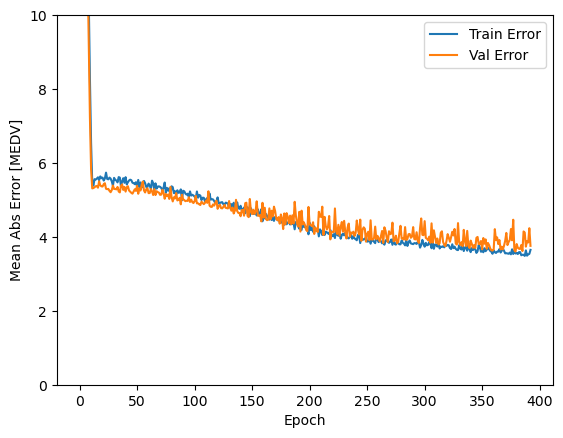

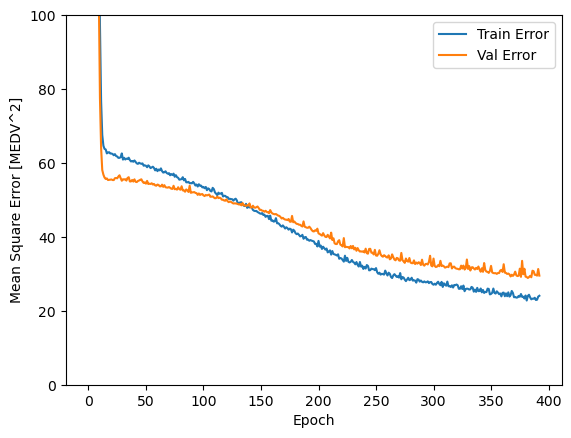

In [28]:
def plot_history(hist) :
    # hist = pd.DataFrame(history.history)
    # hist['epoch'] = hist.epoch


    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [MEDV]')

    plt.plot(hist['epoch'],hist['mae'],label = 'Train Error')
    plt.plot(hist['epoch'],hist['val_mae'],label = 'Val Error')

    plt.legend()
    plt.ylim([0,10])
    plt.show()

    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [MEDV^2]')
    plt.plot(hist['epoch'],hist['mse'],label = 'Train Error')
    plt.plot(hist['epoch'],hist['val_mse'],label = 'Val Error')
    plt.legend()
    plt.ylim([0,100])
    plt.show()

plot_history(hist)


In [29]:
hist

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
0,577.655823,22.120737,577.655823,568.117737,21.881166,568.117737,0
1,546.238281,21.382206,546.238281,533.799927,21.074738,533.799988,1
2,510.417755,20.518040,510.417755,491.610260,20.068233,491.610260,2
3,465.352692,19.433903,465.352661,439.269684,18.753969,439.269684,3
4,412.364349,18.021872,412.364349,381.915558,17.213806,381.915558,4
...,...,...,...,...,...,...,...
388,23.534683,3.634964,23.534683,29.734465,3.736053,29.734465,388
389,22.924276,3.491533,22.924276,29.705288,3.883977,29.705290,389
390,23.002382,3.525844,23.002382,29.521681,3.849005,29.521681,390
391,23.827785,3.538901,23.827785,31.313635,4.235087,31.313637,391


In [30]:
normed_test_data

,AGE,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,RM,TAX
7,0.055490,-0.474771,-0.338026,-0.381830,-0.298224,-0.353342,-0.360672,-0.396234,-0.347541,-0.351434
11,-0.081392,-0.475017,-0.335513,-0.381830,-0.353083,-0.353342,-0.360672,-0.396234,-0.349031,-0.351434
32,-0.090724,-0.463500,-0.355862,-0.379325,-0.218362,-0.353216,-0.305899,-0.405477,-0.349570,-0.371060
39,-0.714986,-0.475831,-0.343024,-0.427470,-0.436583,-0.354205,-0.331397,-0.414720,-0.343676,-0.640905
58,-0.638249,-0.474682,-0.321065,-0.407248,-0.412886,-0.353980,-0.318176,-0.368504,-0.347788,-0.483904
...,...,...,...,...,...,...,...,...,...,...
476,0.029565,-0.431923,-0.371190,-0.286932,-0.302609,-0.352532,-0.313454,-0.220611,-0.344690,1.390292
486,-0.113538,-0.424486,-0.359903,-0.286932,-0.337129,-0.352811,-0.313454,-0.220611,-0.348071,1.390292
490,0.075192,-0.474201,-0.375581,-0.197508,-0.199983,-0.352577,-0.314398,-0.405477,-0.357400,1.611074
500,-0.114575,-0.474048,-0.369435,-0.364947,-0.343193,-0.352793,-0.322898,-0.386990,-0.348866,0.041067


In [31]:
y_pred = model.predict(normed_test_data)


3/3 [==============================] - 0s 7ms/step


In [32]:
loss,mae,mse= model.evaluate(normed_test_data,test_labels,verbose=0)
print(f"LOSS = {loss} MAE = {mae} MSE = {mse}")

LOSS = 18.369007110595703 MAE = 3.2818429470062256 MSE = 18.369007110595703


In [33]:
loss,mae,mse= model.evaluate(normed_trained_data,train_labels,verbose=0)
print(f"LOSS = {loss} MAE = {mae} MSE = {mse}")


LOSS = 23.602346420288086 MAE = 3.51989483833313 MSE = 23.602346420288086


In [34]:
r2_score(test_labels , y_pred)

0.7113146272044576

In [35]:
y_pred = model.predict(normed_trained_data)


10/10 [==============================] - 0s 2ms/step


In [36]:
r2_score( train_labels , y_pred)

0.7311715168837365

In [37]:
model.save('lr_model')

INFO:tensorflow:Assets written to: lr_model/assets
